## Lab 5 - Supervised learning, cross-validation, hyperparameter tuning

## Difference Between Classification and Regression

Classification and regression are two distinct types of supervised machine learning tasks, each with its own objectives and methods. They are used to solve different types of problems in data analysis and predictive modeling. Here are the key differences between classification and regression:

### Objective

- **Classification:** The primary objective of classification is to categorize data points into predefined classes or categories. It is used when the output variable is a discrete label or class, such as binary (e.g., yes/no, spam/ham) or multiclass (e.g., cat/dog/bird).

- **Regression:** Regression aims to predict a continuous numeric value or a real number. It is used when the output variable is a quantity, such as temperature, stock price, or age.

### Evaluation Metrics

- **Classification:** Common evaluation metrics for classification tasks include accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices. These metrics assess the model's ability to correctly classify data points into their respective classes.

- **Regression:** Common evaluation metrics for regression tasks include mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), R-squared (coefficient of determination), and others. These metrics measure how well the model's predictions align with the actual numeric values.

### Example Applications

- **Classification:** Classification is commonly used in applications such as spam email detection, sentiment analysis, image classification (e.g., identifying objects in images), medical diagnosis (e.g., disease classification), and fraud detection.

- **Regression:** Regression is used in applications such as predicting house prices based on property features, forecasting stock prices, estimating sales revenue based on marketing spending, and predicting patient health outcomes based on clinical data.

### Output Interpretation

- **Classification:** The output of a classification model is often interpretable as the probability or confidence score that a data point belongs to a particular class. Decision thresholds can be adjusted to control the trade-off between precision and recall.

- **Regression:** The output of a regression model is a numeric value, and its interpretation is typically straightforward. It represents an estimated or predicted quantity.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [62]:
# Define matplotlib plots and pandas output
font = {'size': 25}

matplotlib.rc('font', **font)
resize_value = 2.5
matplotlib.rcParams['figure.figsize'] = (resize_value*6.4, resize_value*4.8)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

In [63]:
# Load the "cars.txt" dataset
data_cars = pd.read_csv("cars.csv")
X_linear = data_cars['price'].values.reshape(-1, 1)
y_linear = data_cars['horsepower'].values

In [64]:
data_cars.head()

,symboling,normalized losses,make,fuel type,aspiration,num of doors,body style,drive wheels,engine location,wheel base,length,width,curb weight,engine size,engine type,num of cylinders,?,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


### Regression

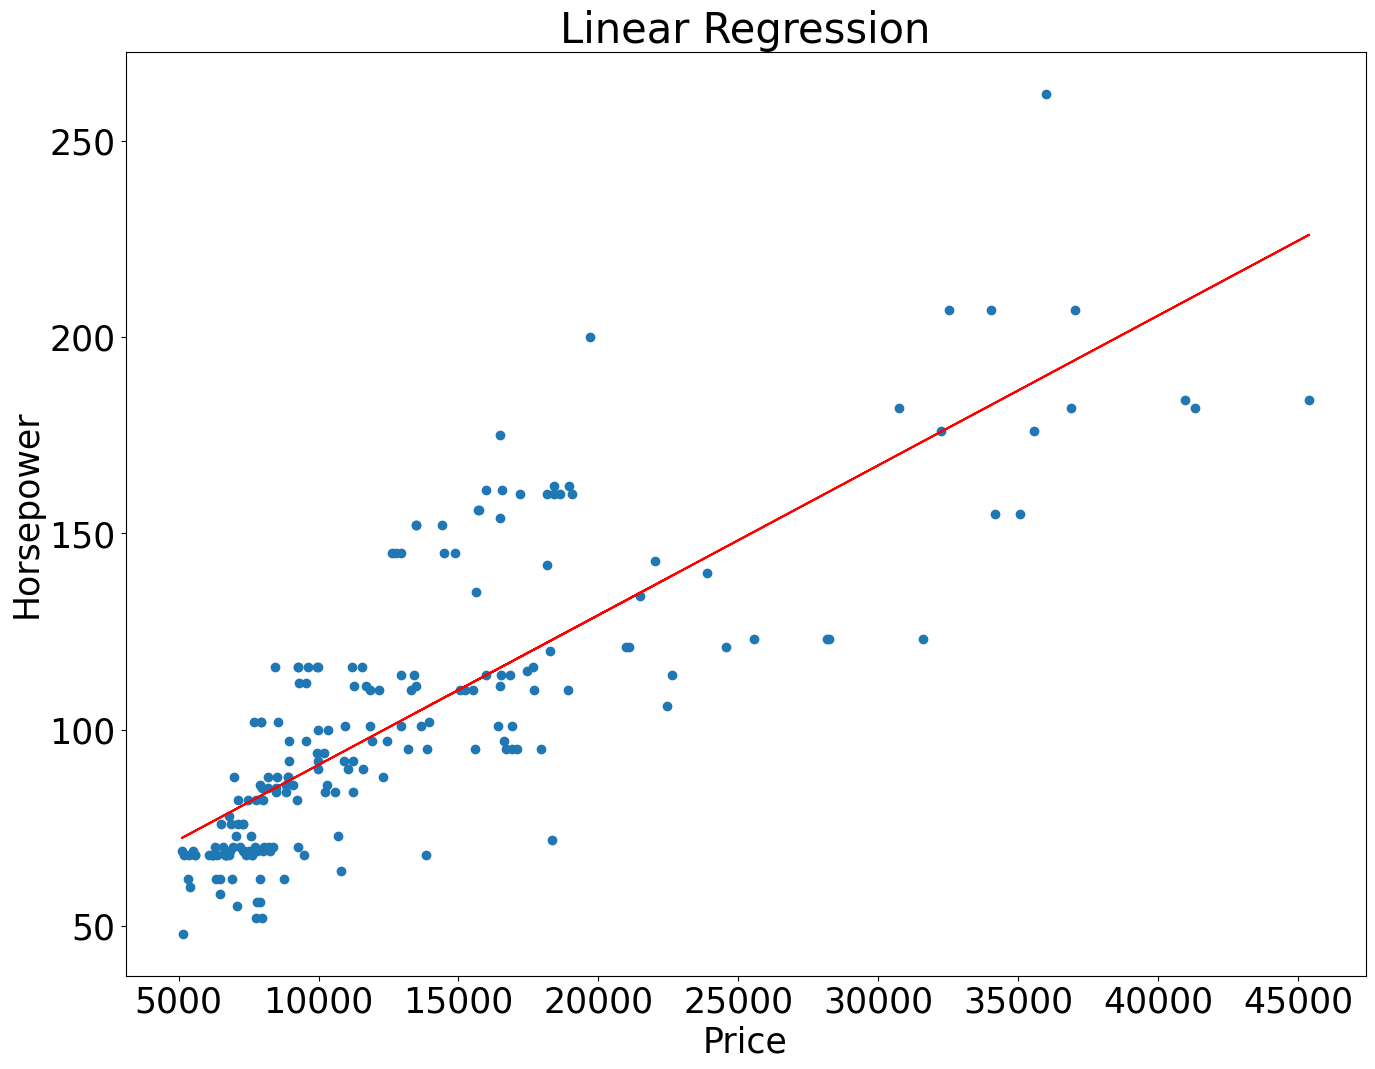

In [65]:
# Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_linear, y_linear)

# Plot the data and linear regression line
plt.scatter(X_linear, y_linear)
plt.plot(X_linear, linear_reg.predict(X_linear), color='red')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Linear Regression')
plt.show()

In [66]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_linear, linear_reg.predict(X_linear)))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 21.939683961786617


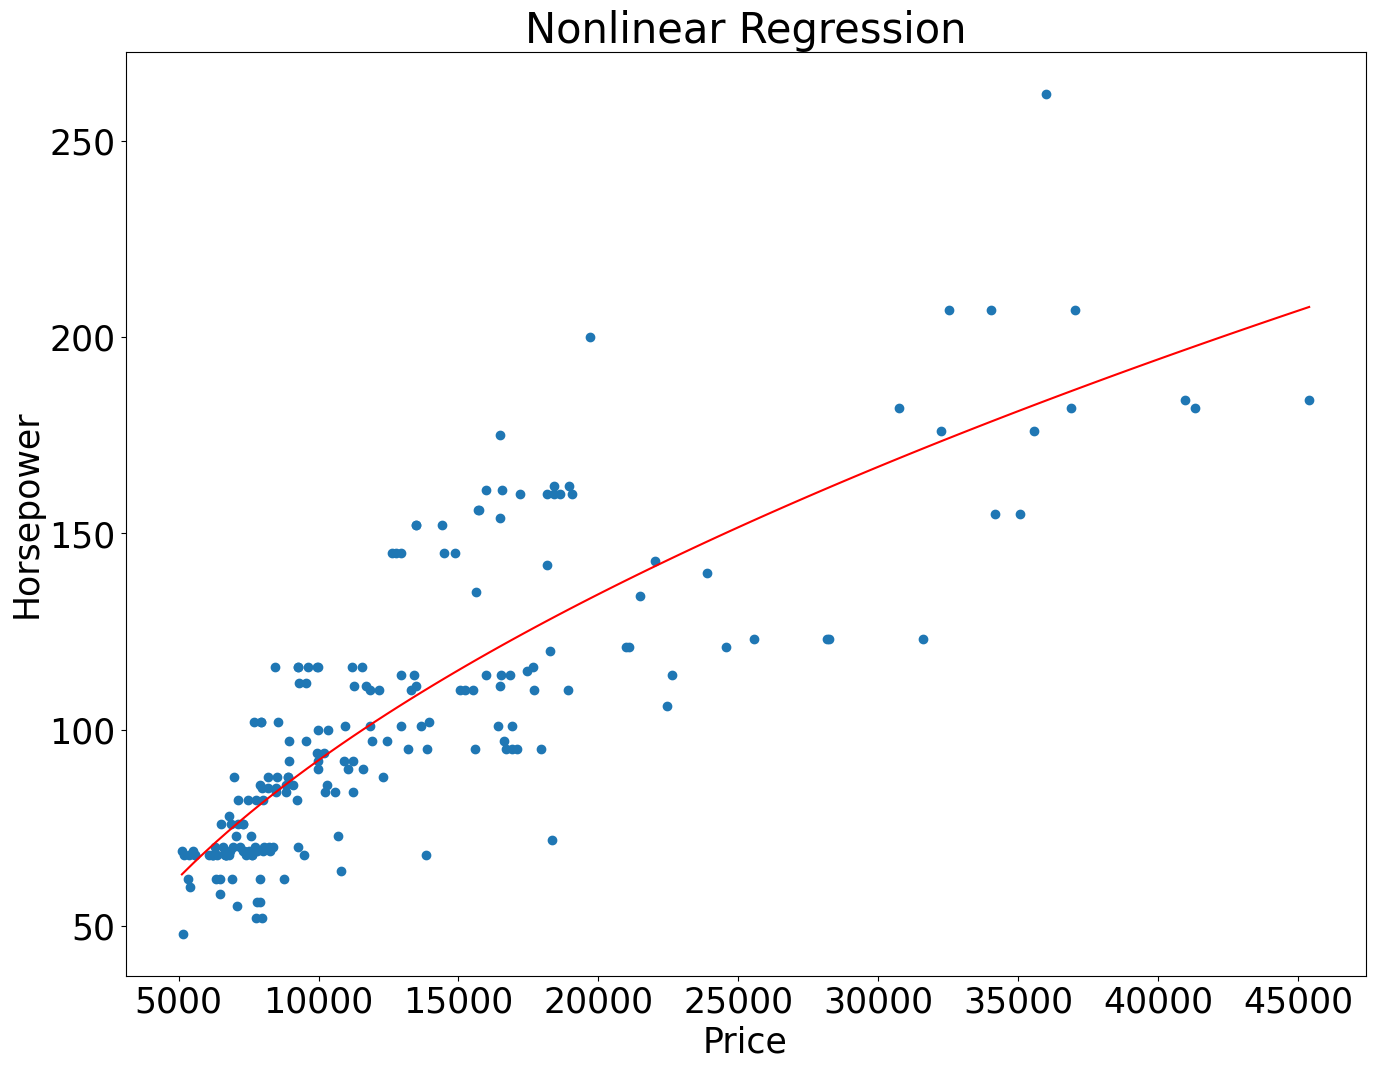

In [67]:
# Nonlinear regression
from scipy.optimize import curve_fit
import numpy as np

def nonlinear_function(x, a, b):
    return a * np.power(x, 0.5) + b

popt, _ = curve_fit(nonlinear_function, data_cars['price'], data_cars['horsepower'])
x_fit = np.linspace(min(data_cars['price']), max(data_cars['price']), 100)
y_fit = nonlinear_function(x_fit, *popt)

plt.scatter(data_cars['price'], data_cars['horsepower'])
plt.plot(x_fit, y_fit, color='red')
plt.xlabel('Price')
plt.ylabel('Horsepower')
plt.title('Nonlinear Regression')
plt.show()

In [68]:
# Evaluation
y_predicted = nonlinear_function(data_cars['price'], *popt)
rmse = np.sqrt(mean_squared_error(data_cars['horsepower'], y_predicted))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 20.865306586503667


In [69]:
# print parameter values
popt

array([ 1.02135523, -9.94877678])

### Classification

In [70]:
# Load the "spamlearn.txt" and "spamtest.txt" datasets
train = pd.read_csv("spamlearn.txt", sep='\t')
test = pd.read_csv("spamtest.txt", sep='\t')
X_train = train.drop(columns=['Class'])
y_train = train['Class']
y_test = test['Class']

In [71]:
# Majority classifier
predicted_labels = [y_train.value_counts().idxmax()]*len(y_test)
accuracy_majority = accuracy_score(y_test, predicted_labels)
print("Majority classifier Accuracy:", accuracy_majority)

Majority classifier Accuracy: 0.3048094940662086


In [72]:
# KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(test.drop(columns=['Class']))
accuracy_knn = accuracy_score(y_test, predicted_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.5871330418488445


### Resampling: Cross-Validation in Machine Learning

Cross-validation is a critical technique in machine learning for evaluating the performance of predictive models. It is used to estimate how well a model will generalize to unseen data, helping to assess its robustness and reliability.

### Why Cross-Validation?

In typical machine learning workflows, data is divided into training and testing sets. The model is trained on the training set, and its performance is evaluated on the testing set. However, a single split of data into training and testing sets may lead to biased performance estimates. Cross-validation addresses this issue by repeatedly splitting the data into training and testing subsets and aggregating the results.

### How Cross-Validation Works

1. **Data Splitting:**

   - The dataset is divided into *k* roughly equal-sized subsets, called "folds" or "folds of data."
   - The model is trained and evaluated *k* times, with each fold serving as the testing set once while the remaining folds are used for training in each iteration.

2. **Iteration:**

   - In each iteration, a different fold is used as the testing set, and the remaining folds are used for training.
   - This process is repeated *k* times, ensuring that each fold serves as the testing set exactly once.

3. **Performance Aggregation:**

   - The performance metrics (e.g., accuracy, F1-score) from each iteration are collected.
   - These metrics are typically averaged to obtain an overall performance estimate for the model.

### Benefits of Cross-Validation

1. **Better Performance Estimation:**

   - Cross-validation provides a more robust estimate of a model's performance by averaging results from multiple iterations.
   - It reduces the risk of overfitting to a specific training-test split.

2. **Optimal Hyperparameter Tuning:**

   - Cross-validation is often used in hyperparameter tuning (e.g., grid search) to find the best hyperparameter values that generalize well.


### Common Cross-Validation Methods

1. **k-Fold Cross-Validation:**

   - The dataset is divided into *k* equal-sized folds.
   - *k-1* folds are used for training, and one fold is used for testing in each iteration.

2. **Stratified k-Fold Cross-Validation:**

   - Similar to k-fold but maintains the class distribution within each fold, useful for imbalanced datasets.

3. **Leave-One-Out Cross-Validation (LOOCV):**

   - *k* is set to the number of data points.
   - In each iteration, one data point is used for testing, and the rest are used for training.


In [73]:
from sklearn.model_selection import StratifiedKFold

# Cross-validation implementation

# Create a copy of training data
X_CV = X_train.copy()
y_CV = y_train.copy()

# Define the number of folds
folds = 3

# Initialize variables for storing evaluation results and overall scores
eval_core = []
overall_scores = []

# We will check K in the range from 1 to 10
for neigh in range(1, 11):

    # Initialize variables to store fold-specific evaluation metrics
    fold_eval = []

    # Initialize k-fold cross-validation
    skf = StratifiedKFold(n_splits=folds, shuffle=False)

    for i, (train_index, test_index) in enumerate(skf.split(X_CV, y_CV)):
        # Select data from train and test based on fold indices
        X_CV_train, X_CV_test = X_CV.iloc[train_index], X_CV.iloc[test_index]
        y_CV_train, y_CV_test = y_CV.iloc[train_index], y_CV.iloc[test_index]

        # Train a KNN classifier with the given parameter k
        knn = KNeighborsClassifier(n_neighbors=neigh)
        knn.fit(X_CV_train, y_CV_train)

        # Predict on the test set
        y_CV_pred = knn.predict(X_CV_test)

        # Compute the accuracy metric for this fold
        accuracy = accuracy_score(y_CV_test, y_CV_pred)
        fold_eval.append(accuracy)

    # Calculate the mean performance across all folds for this k
    mean_accuracy = np.mean(fold_eval)
    print(f'n_neighbours_{neigh}:', mean_accuracy)

    # Append the mean accuracy to the overall scores
    overall_scores.append(mean_accuracy)

# Diagnostic
print('Overall scores:', overall_scores)

# Find the best performing k based on the highest accuracy
best_k = np.argmax(overall_scores) + 1  # Add 1 to convert to 1-based index
print("Best K for KNN:", best_k)

n_neighbours_1: 0.822
n_neighbours_2: 0.823
n_neighbours_3: 0.8210000000000001
n_neighbours_4: 0.8273333333333333
n_neighbours_5: 0.8216666666666667
n_neighbours_6: 0.8246666666666665
n_neighbours_7: 0.824
n_neighbours_8: 0.8236666666666667
n_neighbours_9: 0.8276666666666666
n_neighbours_10: 0.8203333333333332
Overall scores: [0.822, 0.823, 0.8210000000000001, 0.8273333333333333, 0.8216666666666667, 0.8246666666666665, 0.824, 0.8236666666666667, 0.8276666666666666, 0.8203333333333332]
Best K for KNN: 9


## Hyperparameter Tuning in Machine Learning

Hyperparameter tuning, also known as hyperparameter optimization, is a crucial step in machine learning (ML) model development. It involves the process of systematically searching for the best combination of hyperparameters for a given machine learning algorithm.

### What are Hyperparameters?

Hyperparameters are parameters that are not learned from the training data but are set before the training process begins. They control various aspects of the training algorithm and model architecture. Examples of hyperparameters include:
- Learning rates
- Number of hidden layers and neurons in a neural network
- Maximum tree depth
- Number of nearest neighbours
- and many others.

### The Need for Hyperparameter Tuning

Finding the optimal set of hyperparameters is critical because they can greatly affect a model's performance and generalization to unseen data. A poor choice of hyperparameters can lead to:
- Overfitting (the model fits the training data too closely and performs poorly on new data)
- Underfitting (the model is too simple and cannot capture the underlying patterns in the data).

### The Process of Hyperparameter Tuning

Hyperparameter tuning is an iterative and often computationally intensive process. It involves the following steps:

1. **Select a Set of Hyperparameters to Tune:** You start by selecting the hyperparameters that you want to optimize. The choice of hyperparameters depends on the specific machine learning algorithm and model architecture you are using.

2. **Define a Search Space:** You specify a range or a set of possible values for each selected hyperparameter. This range represents the search space that you will explore to find the best combination of hyperparameters.

3. **Choose a Search Method:** There are various methods for searching the hyperparameter space, including:
   - Grid search (exhaustively tries all possible combinations within the specified range)
   - Random search (samples hyperparameters randomly)

4. **Evaluate Model Performance:** For each set of hyperparameters, you train the model on a portion of your data (training set) and evaluate its performance on another portion (validation set or cross-validation). Common evaluation metrics include accuracy, precision, recall, F1-score, and mean squared error, depending on the type of problem (classification or regression).

5. **Select the Best Hyperparameters:** After evaluating the model's performance for each set of hyperparameters, you choose the combination that results in the best performance according to the validation strategy.

### Validation and Test Sets

It's important to have a separate test set that you do not use during hyperparameter tuning. Once you have selected the best hyperparameters using the validation set, you should evaluate the model's performance on the test set to get an unbiased estimate of its performance on new, unseen data.

### Iterative Process

Hyperparameter tuning is often an iterative process. You may need to adjust your search space, search method, or other hyperparameters based on the results obtained. This process continues until you achieve the desired level of model performance.


In [74]:
# KNN Hyperparameter tuning using Grid Search
param_grid_knn = {'n_neighbors': list(range(1, 11))}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, verbose=3)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
predicted_best_knn = best_knn.predict(test.drop(columns=['Class']))
accuracy_best_knn = accuracy_score(y_test, predicted_best_knn)
print("Best KNN Accuracy:", accuracy_best_knn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.830 total time=   0.0s
[CV 2/3] END .....................n_neighbors=1;, score=0.814 total time=   0.0s
[CV 3/3] END .....................n_neighbors=1;, score=0.822 total time=   0.0s
[CV 1/3] END .....................n_neighbors=2;, score=0.823 total time=   0.0s
[CV 2/3] END .....................n_neighbors=2;, score=0.826 total time=   0.0s
[CV 3/3] END .....................n_neighbors=2;, score=0.820 total time=   0.0s
[CV 1/3] END .....................n_neighbors=3;, score=0.826 total time=   0.0s
[CV 2/3] END .....................n_neighbors=3;, score=0.816 total time=   0.0s
[CV 3/3] END .....................n_neighbors=3;, score=0.821 total time=   0.0s
[CV 1/3] END .....................n_neighbors=4;, score=0.826 total time=   0.0s
[CV 2/3] END .....................n_neighbors=4;, score=0.818 total time=   0.0s
[CV 3/3] END .....................n_neighbors=4;

In [75]:
# Decision Trees
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=25)
dt.fit(X_train, y_train)
predicted_dt = dt.predict(test.drop(columns=['Class']))
accuracy_dt = accuracy_score(y_test, predicted_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.84946908182386


In [76]:
# Decision Hyperparameter tuning using Grid Search

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 20, 50],  # Adjust the range as needed
    'min_samples_split': [10, 30],
    'min_samples_leaf': [1, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Create a grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

# Make predictions on your test data
predicted_dt = best_dt.predict(test.drop(columns=['Class']))

# Calculate the accuracy of the tuned Decision Tree
accuracy_dt = accuracy_score(y_test, predicted_dt)
print("Tuned Decision Tree Accuracy:", accuracy_dt)
print("Best Hyperparameters:", best_params)

Tuned Decision Tree Accuracy: 0.8831980012492192
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'splitter': 'best'}


## Random Forest Parameters

1. **n_estimators:** The number of decision trees in the ensemble. Increasing this value generally improves model performance and robustness.

2. **max_depth:** The maximum depth or levels of each decision tree. It controls tree depth and helps prevent overfitting.

3. **min_samples_split:** The minimum number of samples required to split a node further in the decision tree. It prevents overfitting by setting a minimum node size for splits.

4. **max_features:** The number of features randomly selected at each split. It introduces randomness and reduces overfitting by controlling feature subsets.

5. **bootstrap:** A boolean parameter that determines whether bootstrap samples are used when building individual decision trees. Bootstrapping adds randomness and enhances model robustness.


In [87]:
# Random Forest
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
predicted_rf = rf.predict(test.drop(columns=['Class']))
accuracy_rf = accuracy_score(y_test, predicted_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8856964397251718


In [88]:
# Random Search for Random Forest
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 20, 50]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
predicted_best_rf = best_rf.predict(test.drop(columns=['Class']))
accuracy_best_rf = accuracy_score(y_test, predicted_best_rf)
print("Best Random Forest Accuracy:", accuracy_best_rf)

Best Random Forest Accuracy: 0.8956901936289818


# Support vector machine

In [89]:
# SVM
svm = SVC(C=100)
svm.fit(X_train, y_train)
predicted_svm = svm.predict(test.drop(columns=['Class']))
accuracy_svm = accuracy_score(y_test, predicted_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.6058713304184884


In [90]:
# Hyperparameter tuning for SVM using Grid Search
param_grid = {'C': [50, 100, 150]}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
predicted_best_svm = best_svm.predict(test.drop(columns=['Class']))
accuracy_best_svm = accuracy_score(y_test, predicted_best_svm)
print("Best SVM Accuracy:", accuracy_best_svm)

Best SVM Accuracy: 0.6514678326046222


# Naive Bayes

In [91]:
# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predicted_gnb = gnb.predict(test.drop(columns=['Class']))
accuracy_gnb = accuracy_score(y_test, predicted_gnb)
print("Naive Bayes Accuracy:", accuracy_gnb)

Naive Bayes Accuracy: 0.8732042473454091


## Visualize results

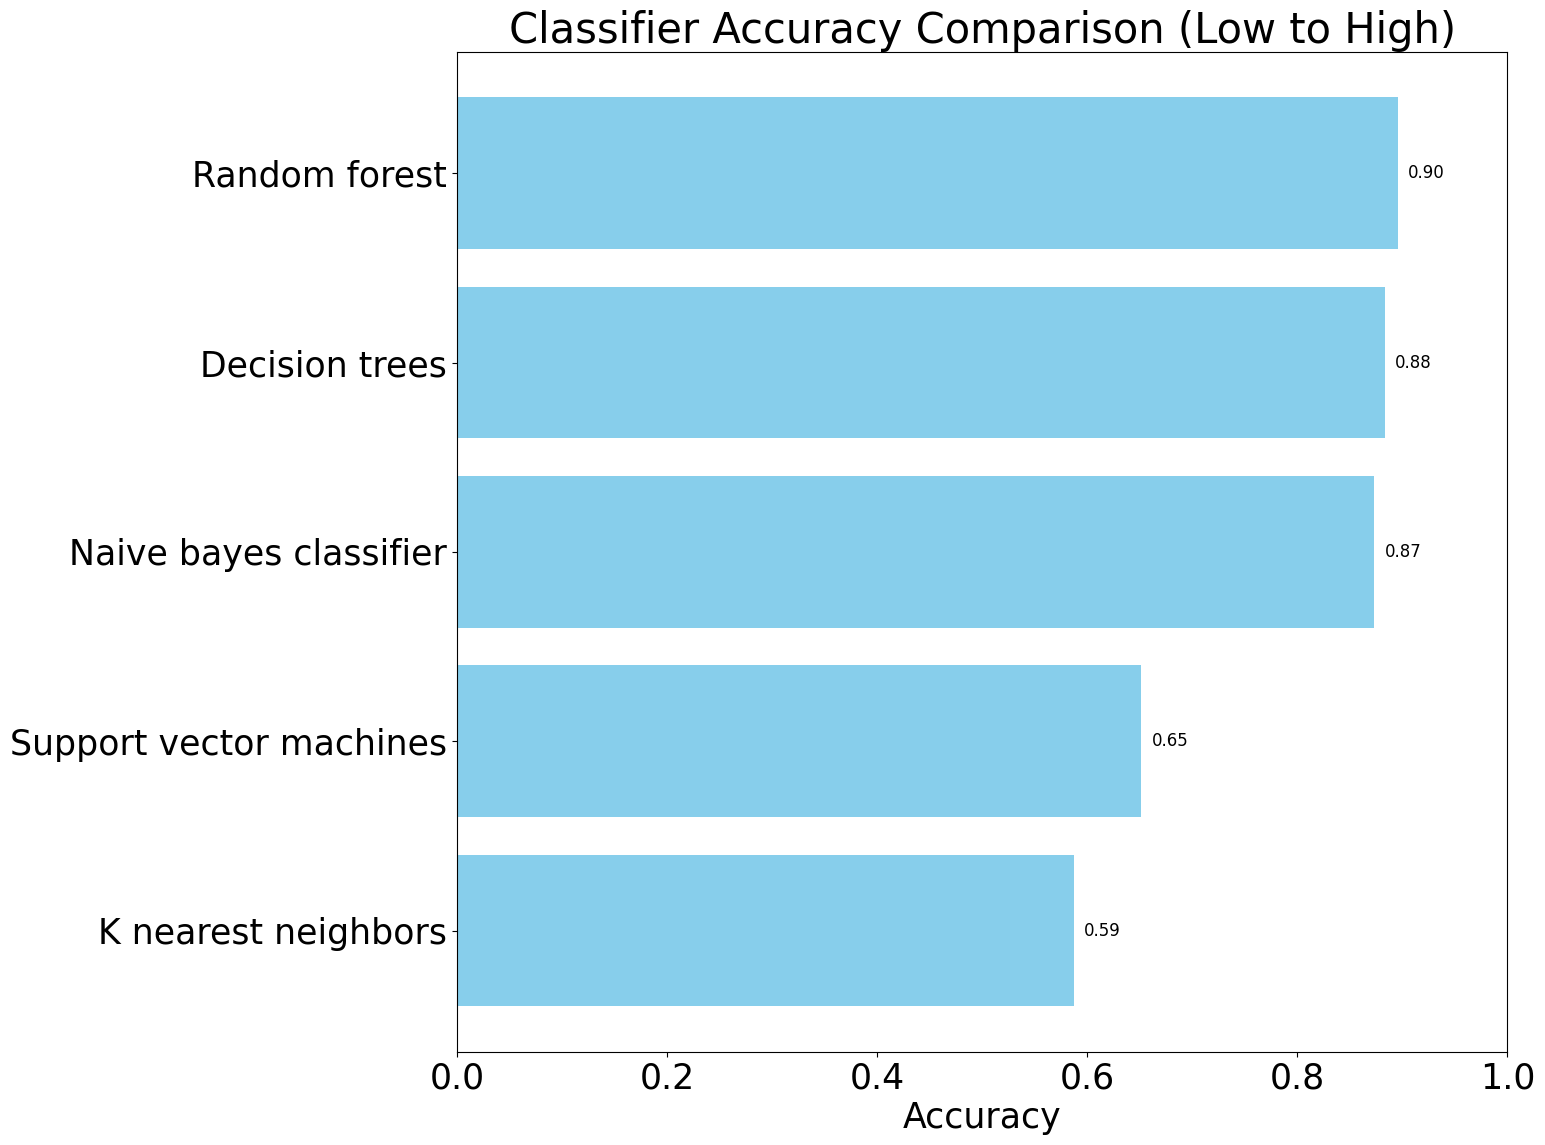

In [92]:
# Create a plot for the results
results = [accuracy_best_svm, accuracy_best_rf, accuracy_best_knn, accuracy_gnb, accuracy_dt]
classifiers = ['Support vector machines', 'Random forest', 'K nearest neighbors', 'Naive bayes classifier', 'Decision trees']

# Sort results and classifiers in ascending order of accuracy
sorted_results, sorted_classifiers = zip(*sorted(zip(results, classifiers)))

# Create a bar plot
plt.barh(sorted_classifiers, sorted_results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison (Low to High)')
plt.xlim(0, 1.0)  # Set the x-axis limits from 0 to 1 for accuracy values

# Annotate the bars with accuracy values
for i, result in enumerate(sorted_results):
    plt.text(result + 0.01, i, f'{result:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()